# Data Visualizations
Here is my step counts visualized before doing any analysis on them.

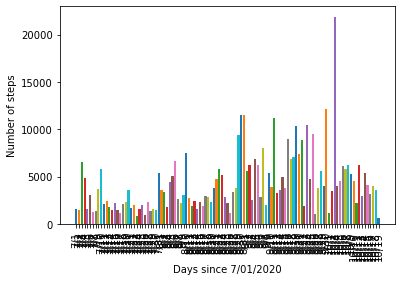

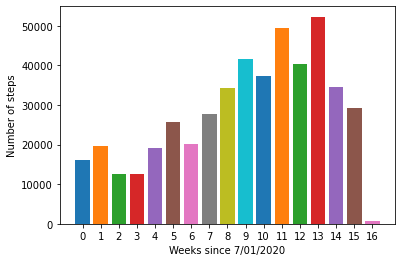

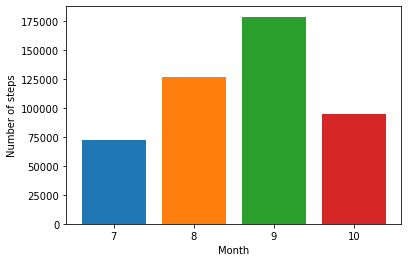

In [1]:
import functions as func
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

steps_data_df = func.clean_xml('export.xml', save=True)

plt.figure()  
# plot the month versus number of steps
for key, group in steps_data_df.groupby(pd.Grouper(key='creationDate', freq='D')):
    plt.bar(str(key.month) + '/' + str(key.day), sum(group['value']))
plt.xticks(rotation='90')
plt.xlabel('Days since 7/01/2020')
plt.ylabel('Number of steps')
plt.show()

plt.figure()
# plot the month versus number of steps
for key, group in steps_data_df.groupby(pd.Grouper(key='creationDate', freq='W')):
    plt.bar(str(key.week - 27), sum(group['value']))
plt.xlabel('Weeks since 7/01/2020')
plt.ylabel('Number of steps')
plt.show()

plt.figure()  
# plot the month versus number of steps
for key, group in steps_data_df.groupby(pd.Grouper(key='creationDate', freq='M')):
    plt.bar(str(key.month), sum(group['value']))
plt.xlabel('Month')
plt.ylabel('Number of steps')
plt.show()

In [38]:
daily_data_group = steps_data_df.groupby(pd.Grouper(key='creationDate', freq='D'))
daily_steps = pd.Series()

# prepare data to be by day
for key, value in daily_data_group:
    daily_steps[str(key.month) + '/' + str(key.day)] = sum(value['value'])
print(daily_steps)

print('Mean steps from 7/1/20 to 8/31/20', daily_steps[daily_steps.index < '9/01/2020'].mean())
print('Mean steps from 9/1/20 to 10/19/20', daily_steps[daily_steps.index >= '9/01/2020'].mean())
print('DF: ', len(steps_data_df))

7/1      1524
7/2      1522
7/3      6573
7/4      4821
7/5      1590
         ... 
10/15    4134
10/16    3137
10/17    3985
10/18    3546
10/19     649
Length: 111, dtype: int64
Mean steps from 7/1/20 to 8/31/20 3634.753086419753
Mean steps from 9/1/20 to 10/19/20 5965.3
DF:  4028


<ipython-input-38-6ca179de0a69>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  daily_steps = pd.Series()


# Quantified Self Project Hypothesis Testing
For my project data I have hypothesized that on average the number of steps I take on a certain day will be less after school starts on septermber 1, 2020. I will test this hypothesis using a two sample, one tailed t-test. I will split my original data into two groups, one starting after school starts and one from before. 

## Step 1: 
$H_0$: The average number of steps taken on a day before school starts $>$ the average number of steps taken on a day after school starts.

$H_1$: The average number of steps taken on a day before school starts $\leq$ the average number of steps taken on a day after school starts.
## Step 2:
For this test I will be using a level of significance of $0.005$.
## Step 3:
for our two-sample independent test of means we will have:  

test-statistic = $t = \frac{\bar X_1 - \bar X_2}{\sqrt{S_p ^2 (\frac{1}{n_1} + \frac{1}{n_2})}}$.
## Step 4:
df = 4028
t-critical $= 2.576$

**Decision Rule:**

If t-computed $> 2.576$, then reject $H_0$.  

If t-computed $\leq 2.576$, then DO NOT reject $H_0$.
## Step 5

In [40]:
t_computed, p_value = stats.ttest_ind(daily_steps[daily_steps.index < '9/01/2020'], daily_steps[daily_steps.index >= '9/01/2020'])
print(t_computed, p_value / 2)

-3.6405208996583447 0.00020890213712700982


Since t-computed (3.6405) is greater than 2.567 then we reject $H_0$ and fail to reject $H_1$: number of daily steps before school starts $\leq$ number of daily steps after school stars.

This conclusion backs up our visualizations as we can see that the step count increases in the later half of our data backing up our hypothesis testing. 